In [2]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
import pandas as pd 
import numpy as np
%matplotlib inline

In [3]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)

In [4]:
#in clustering we don't take value of y so we will ignore y
X.shape

(1000, 2)

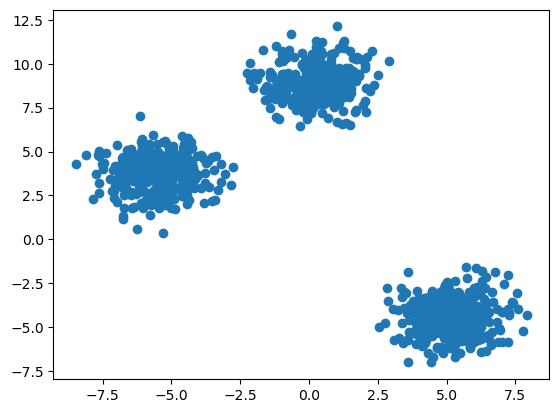

In [5]:
plt.scatter(X[:,0],X[:,1])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [8]:
from sklearn.cluster import KMeans

In [9]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

c:\Users\pankr\miniconda3\envs\ev\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\pankr\miniconda3\envs\ev\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\pankr\miniconda3\envs\ev\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\pankr\miniconda3\envs\ev\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is k

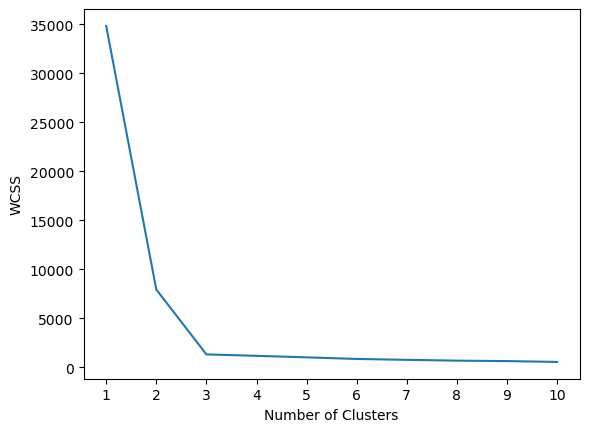

In [ ]:
plt.title("Elbow Curve")
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [11]:
kmeans = KMeans(n_clusters=3, init="k-means++")

In [12]:
y_labels = kmeans.fit_predict(X_train)

c:\Users\pankr\miniconda3\envs\ev\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


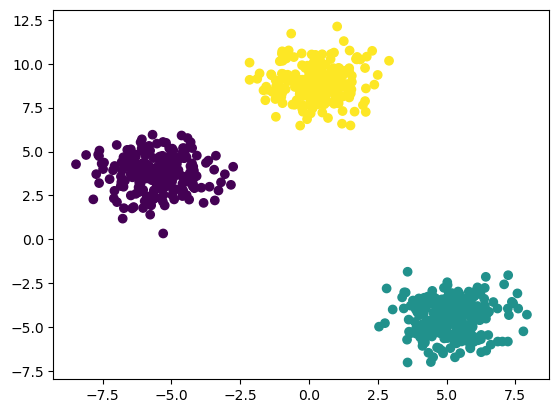

In [13]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [14]:
y_test_labels = kmeans.predict(X_test)

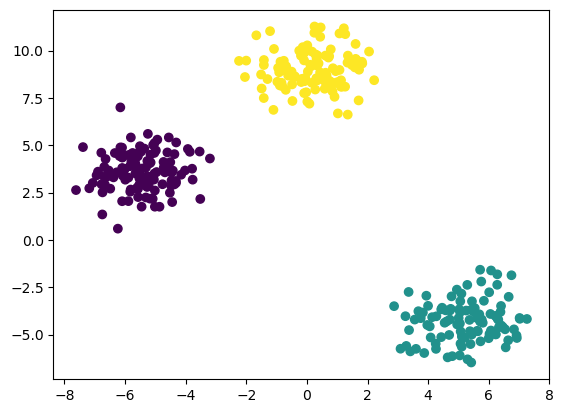

In [15]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

In [16]:
from kneed import KneeLocator

In [17]:
KL = KneeLocator(range(1,11),wcss, curve='convex',direction='decreasing')
KL.elbow

3

In [18]:
#performance metrics
#silhoutte score

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
silhouette_coefficient = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficient.append(score)

c:\Users\pankr\miniconda3\envs\ev\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\pankr\miniconda3\envs\ev\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\pankr\miniconda3\envs\ev\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\pankr\miniconda3\envs\ev\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is k

In [21]:
silhouette_coefficient

[0.7281443868598331,
 0.8071181203797672,
 0.6511020624640877,
 0.472702039026871,
 0.3320670244186402,
 0.4674579265824966,
 0.3356836878119562,
 0.33871263686311337,
 0.3356484455523906]

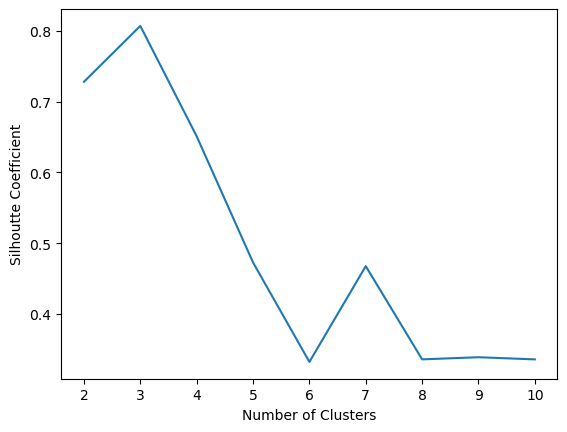

In [22]:
plt.plot(range(2,11),silhouette_coefficient)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Coefficient")
plt.show()